In [45]:
import tensorflow as tf
import os
import skimage
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
import random
import numpy as np

In [38]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

In [39]:
l = tf.multiply(x1,x2)
print(l)

Tensor("Mul_4:0", shape=(4,), dtype=int32)


In [40]:
sas = tf.Session()

In [41]:
print(sas.run(l))

[ 5 12 21 32]


In [80]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/Prashanth/Downloads"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

In [76]:
images

[array([[[ 47,  52,  59],
         [ 35,  64,  72],
         [ 53, 104, 112],
         ...,
         [ 75,  82,  60],
         [ 72,  77,  55],
         [ 68,  71,  50]],
 
        [[ 46,  51,  57],
         [ 38,  66,  74],
         [ 58, 109, 115],
         ...,
         [ 74,  84,  62],
         [ 76,  84,  62],
         [ 76,  83,  61]],
 
        [[ 44,  50,  56],
         [ 44,  71,  79],
         [ 59, 109, 115],
         ...,
         [ 71,  83,  61],
         [ 74,  84,  63],
         [ 75,  84,  63]],
 
        ...,
 
        [[120, 141, 139],
         [119, 144, 138],
         [114, 141, 131],
         ...,
         [ 33,  30,  27],
         [ 32,  30,  28],
         [ 30,  30,  28]],
 
        [[133, 151, 145],
         [124, 146, 138],
         [111, 137, 127],
         ...,
         [ 31,  30,  25],
         [ 32,  32,  27],
         [ 33,  33,  30]],
 
        [[139, 158, 147],
         [124, 146, 137],
         [107, 132, 123],
         ...,
         [ 31,  30,  23],
  

In [77]:
images = np.asarray(images)
labels = np.asarray(labels)

In [78]:
images

array([array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36

In [54]:
labels.ndim

1

In [55]:
images.size

4575

In [56]:
labels.size

4575

In [81]:
images[0]

array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36,  31]]

In [58]:
images[1]

array([[[255, 255, 253],
        [255, 255, 253],
        [255, 255, 252],
        ...,
        [ 20,  18,  19],
        [ 21,  17,  18],
        [ 20,  15,  17]],

       [[255, 255, 253],
        [255, 255, 252],
        [255, 255, 252],
        ...,
        [ 24,  18,  19],
        [ 22,  17,  18],
        [ 20,  15,  17]],

       [[254, 255, 253],
        [254, 255, 253],
        [255, 255, 253],
        ...,
        [ 28,  19,  21],
        [ 24,  17,  18],
        [ 21,  14,  16]],

       ...,

       [[ 44,  48,  51],
        [ 43,  46,  51],
        [ 43,  45,  50],
        ...,
        [ 14,  11,  11],
        [ 17,  12,  11],
        [ 19,  14,  12]],

       [[ 44,  45,  47],
        [ 43,  43,  47],
        [ 42,  42,  47],
        ...,
        [ 15,  11,  12],
        [ 18,  12,  12],
        [ 19,  14,  13]],

       [[ 43,  42,  43],
        [ 42,  40,  43],
        [ 41,  39,  42],
        ...,
        [ 17,  12,  14],
        [ 18,  12,  14],
        [ 19,  13,  14]]

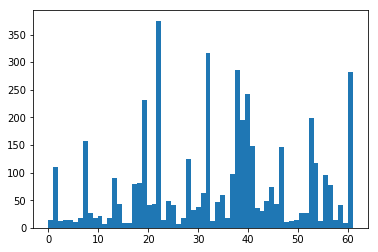

In [82]:
import matplotlib.pyplot as plt 
plt.hist(labels, 62)
plt.show()

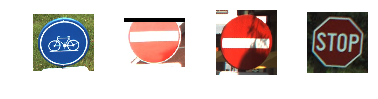

In [83]:
import matplotlib.pyplot as plt
traffic_signs = [300, 2250, 2251, 4000]
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
plt.show()

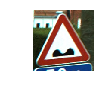

shape: (141, 142, 3), min: 0, max: 255


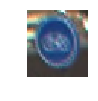

shape: (44, 40, 3), min: 13, max: 255


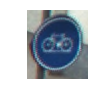

shape: (69, 61, 3), min: 9, max: 243


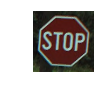

shape: (123, 123, 3), min: 0, max: 215


In [84]:
import matplotlib.pyplot as plt

traffic_signs = [100, 250, 225, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

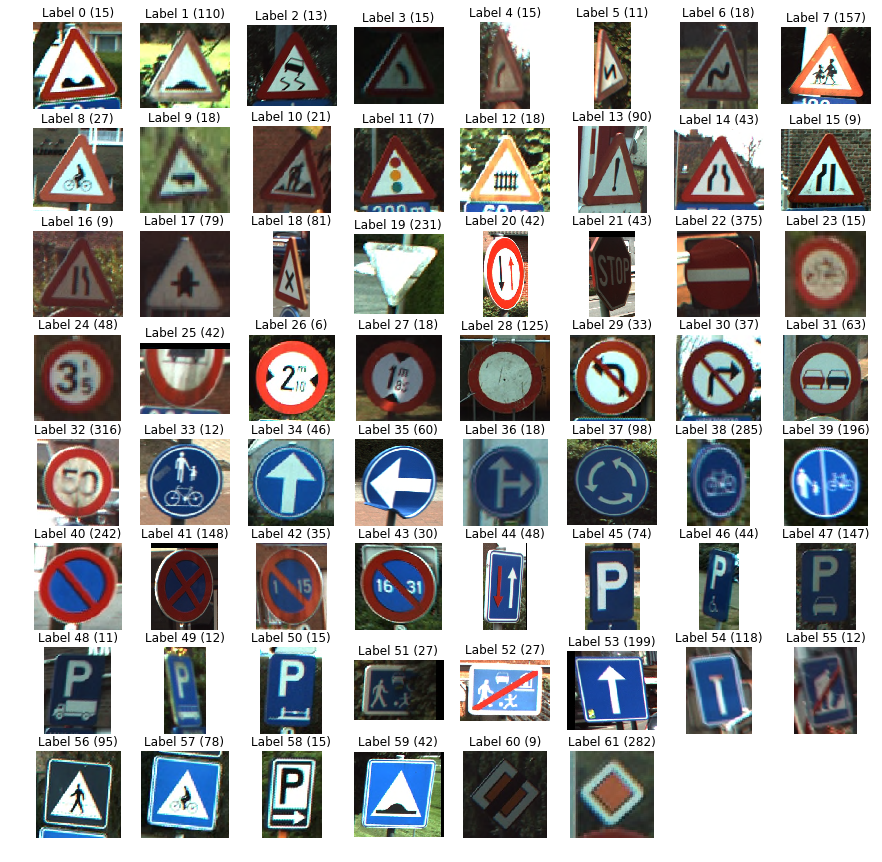

In [85]:
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [86]:
from skimage import transform 
#rescaling
images28 = [transform.resize(image, (28, 28)) for image in images]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


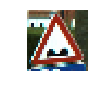

shape: (28, 28, 3), min: 0.013993097238897698, max: 1.0


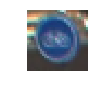

shape: (28, 28, 3), min: 0.06982793117246876, max: 0.9999999999999992


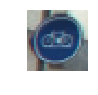

shape: (28, 28, 3), min: 0.05262479991996812, max: 0.926639405762305


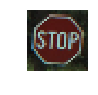

shape: (28, 28, 3), min: 0.04141781712685025, max: 0.8151298019207689


In [89]:
import matplotlib.pyplot as plt

traffic_signs = [100, 250, 225, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

In [90]:
from skimage.color import rgb2gray

# Converttoanarray
images28 = np.array(images28)
#tograyscale
images28 = rgb2gray(images28)

array([[[0.38965759, 0.52519555, 0.50872846, ..., 0.29360112,
         0.2602903 , 0.30811003],
        [0.36896225, 0.51881623, 0.50246109, ..., 0.32619916,
         0.31140831, 0.31127529],
        [0.4289148 , 0.56030313, 0.49401135, ..., 0.34672205,
         0.33060061, 0.31387237],
        ...,
        [0.50696706, 0.53126532, 0.5088198 , ..., 0.18652384,
         0.18113741, 0.10467873],
        [0.52835139, 0.47883375, 0.46244261, ..., 0.19014449,
         0.13850854, 0.09728847],
        [0.52695013, 0.46232152, 0.46433902, ..., 0.17831516,
         0.13213945, 0.11870507]],

       [[0.99697099, 0.99888442, 0.99780778, ..., 0.04935275,
         0.07343233, 0.10795393],
        [0.9979093 , 0.99971725, 0.99903433, ..., 0.17077764,
         0.20071095, 0.0778177 ],
        [0.99674363, 0.99704971, 0.9997627 , ..., 0.11468812,
         0.09063579, 0.06881083],
        ...,
        [0.10027521, 0.10439534, 0.09557912, ..., 0.16964857,
         0.07683692, 0.0707503 ],
        [0.1

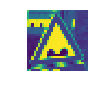

shape: (28, 28), min: 0.042401822729091126, max: 0.9993835154061623


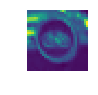

shape: (28, 28), min: 0.18882557422969246, max: 0.9784864625850329


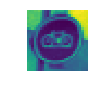

shape: (28, 28), min: 0.154780931372549, max: 0.9230208036964787


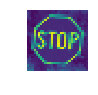

shape: (28, 28), min: 0.053314236569627534, max: 0.7741098245548226


In [92]:
import matplotlib.pyplot as plt

traffic_signs = [100, 250, 225, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

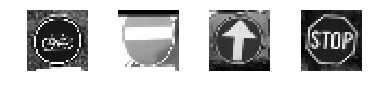

In [93]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
# running again as the images are displayed as heatmap by default, hence gray needs to be specified in cmap 
plt.show()

In [97]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [98]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_2/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_2/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_2:0", shape=(?,), dtype=int64)


In [99]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 

In [101]:
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[20, 17, 32, 31, 41, 21, 37, 42, 57, 22]
[32  7 32 31 40 38 32 40 56 22]


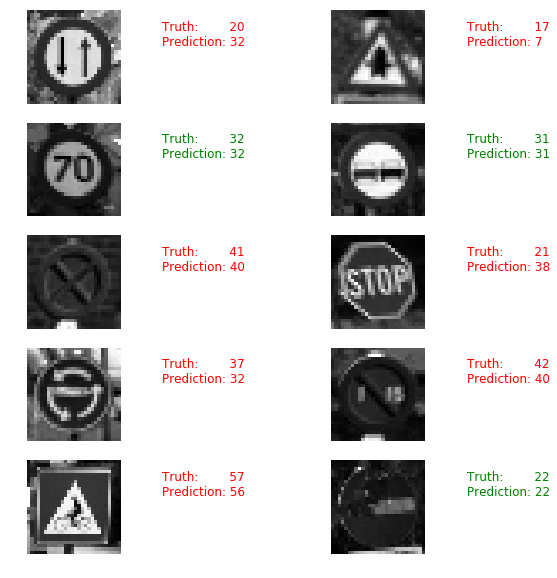

In [102]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [103]:
# Import `skimage`
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Accuracy: 0.506


In [104]:
sess.close()